<a href="https://colab.research.google.com/github/analouvain/BI-Master-RN/blob/main/chatbot_Oncoguia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho de Redes Neurais - CHATBOT**

**BI Master - Puc-Rio**

**Aluna:** Ana Paula Costa Assumpção

**Turma:** 2022.1

**Matrícula:** 221100813


---


# **Objetivo:**

Montar uma base de conhecimento e utilizar o modelo BERTimbau para pergunta & resposta e analisar os resultados

# **Base de Conhecimento**

A Base de conhecimento foi obtida fazendo o scraping da sessão **Guia Detalhado do Câncer de Mama** do site do instituto **Oncoguia**.
O Oncoguia é uma ong cujo objetivo é informar, apoiar e defender os direitos dos pacientes com câncer.

A partir da URL do **Guia Detalhado do Câncer de Mama** percorreu-se cada link de tópicos extraindo o texto encontrado para cada tópico.


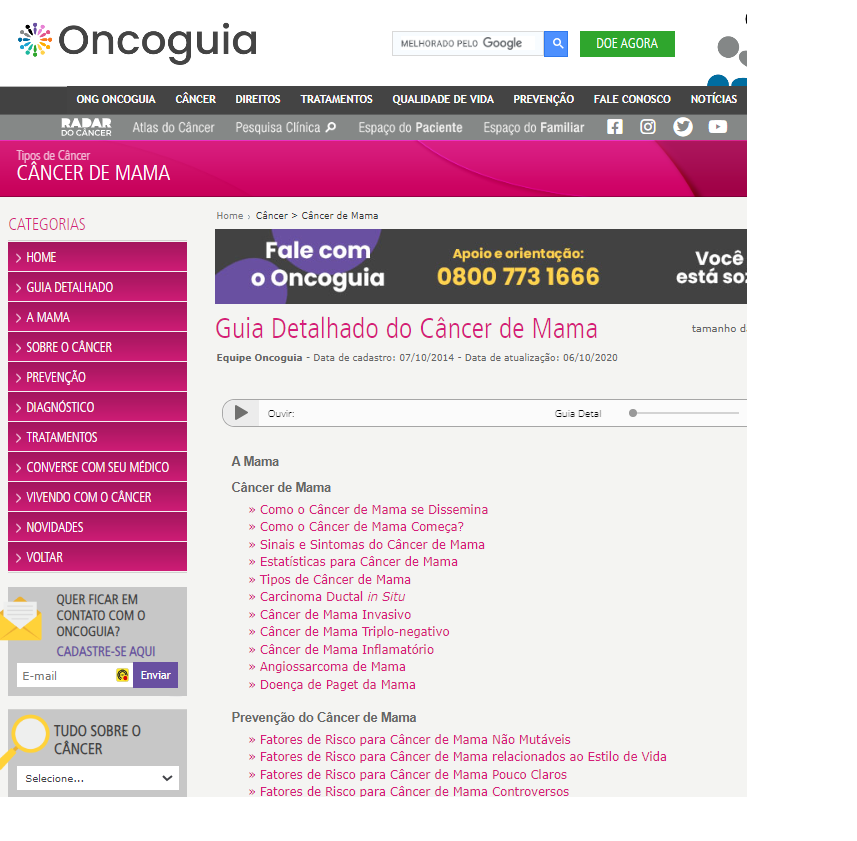



# Extração de conteúdo para a montagem da Base de Conhecimento

Foi utilizada a biblioteca **BeautifulSoup** para o scraping


Importação das bibiliotecas necessárias:

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Realizando o Request

Inicializando o Data Frame para aramazenar os tópicos da base de conhecimento


In [ ]:
response = requests.get('http://www.oncoguia.org.br/conteudo/guia-detalhado/2911/12/')

content = response.content

soup = BeautifulSoup(content, 'html.parser')

df_cancer_mama = pd.DataFrame(columns=['topic', 'link', 'text'])

Criação de uma função auxiliar que a partir de um link de tópico da página Oncoguia, obtém o texto limpo do tópico

In [ ]:
def getTopicText(link):

  text = ""

  # Fazer uma solicitação HTTP para obter o conteúdo da página
  response = requests.get(link)
  if response.status_code == 200:
      # Criar um objeto BeautifulSoup com o conteúdo da página
      page_soup = BeautifulSoup(response.text, 'html.parser')

      # Encontrar a tag 'div' com a classe 'wrap dynamic'
      wrap_dynamic_div = page_soup.find('div', class_='wrap dynamic')

      if wrap_dynamic_div:
          # Encontrar todas as tags 'p', exceto a última
          p_tags = wrap_dynamic_div.find_all('p')[:-1]

          # Concatenar os textos das tags 'p' em uma única string
          text = ' '.join([p.get_text() for p in p_tags])

  else:
      print(f'Falha ao acessar {link}')

  return text



O trecho de código abaixo realiza um request para a URL do **Guia Detalhado do Câncer de Mama**, percorre cada link de tópicos, entra em cada link e extrai o texto encontrado para cada tópico, criando preenchendo o dataset com as seguintes informações: **Tópico**, **Link** e **Texto** (`topic`, `link` e `text`)



In [ ]:
# Encontrando a div com a classe 'wrap dynamic', que contém o texto principal da página
wrap_dynamic_div = soup.find('div', class_='wrap dynamic')

# Verificar se a div foi encontrada
if wrap_dynamic_div:
    # Encontrar todas as tags 'ul' com a classe 'detail-guide' dentro da div
    ul_tags = wrap_dynamic_div.find_all('ul', class_='detail-guide')


    # Iterar sobre as tags 'ul'
    for ul_tag in ul_tags:
        # Encontrar todas as tags 'li' dentro da tag 'ul'
        li_tags = ul_tag.find_all('li')

        # Iterar sobre as tags 'li'
        for li_tag in li_tags:
            # Procurar a tag 'h3' dentro da tag 'li'
            h3_tag = li_tag.find('h3')

            # Inicializar variáveis para armazenar o link e o nome
            link = None
            topic = None

            # Verificar se a tag 'h3' foi encontrada
            if h3_tag:
                # Obter o link (href) e o nome (texto) da tag 'h3'
                link = h3_tag.find('a')['href']
                topic = h3_tag.text
            else:
                # Caso não exista a tag 'h3', procurar o link e o nome diretamente dentro da tag 'li'
                link_tag = li_tag.find('a')
                if link_tag:
                    link = link_tag['href']
                    topic = link_tag.text

            # Se pelo menos o link for encontrado, adicione ao dataset
            if link:

                #Entra no link e obtem o texto da página associada (tópico)
                text = getTopicText(link)

                new_row = pd.DataFrame([{'topic': topic,
                            'link': link,
                            'text': text}])

                df_cancer_mama = pd.concat([df_cancer_mama, new_row], ignore_index=True)

else:
    print("Div 'wrap dynamic' não encontrada.")

Abaixo podemos visualizar como ficou o dataset da nossa Base de Conhecimento organizada por tópicos


In [ ]:
df_cancer_mama

,topic,link,text
0,A Mama,http://www.oncoguia.org.br/conteudo/a-mama/748...,"A glândula mamária, é um órgão par, que se sit..."
1,Câncer de Mama,http://www.oncoguia.org.br/conteudo/sobre-o-ca...,O câncer de mama é o crescimento descontrolado...
2,Como o Câncer de Mama se Dissemina,http://www.oncoguia.org.br/conteudo/como-o-can...,O câncer de mama pode se disseminar quando as ...
3,Como o Câncer de Mama Começa?,http://www.oncoguia.org.br/conteudo/como-o-can...,Muitos fatores de risco podem aumentar a chanc...
4,Sinais e Sintomas do Câncer de Mama,http://www.oncoguia.org.br/conteudo/sinais-e-s...,"Os sinais e sintomas do câncer podem variar, e..."
...,...,...,...
64,Como diminuir o Risco da Recidiva do Câncer de...,http://www.oncoguia.org.br/conteudo/como-dimin...,"Se você tem (ou teve) câncer de mama, provavel..."
65,Imagem Corporal e Sexualidade após o Câncer de...,http://www.oncoguia.org.br/conteudo/o-corpo-e-...,Aprender a aceitar e se sentir bem com o seu c...
66,Gravidez após o Câncer de Mama,http://www.oncoguia.org.br/conteudo/gravidez-a...,O câncer de mama é mais frequente em mulheres ...
67,Terapia Hormonal na Menopausa após o Câncer de...,http://www.oncoguia.org.br/conteudo/terapia-ho...,"A terapia hormonal pós-menopausa, também denom..."


Abaixo podemos ver a lista de tópicos da nossa Base de conhecimento

In [ ]:
for index, row in df_cancer_mama.iterrows():
    topic = row['topic']
    print(f'Índice: {index}, Topic: {topic}')

Índice: 0, Topic: A Mama
Índice: 1, Topic: Câncer de Mama
Índice: 2, Topic: Como o Câncer de Mama se Dissemina
Índice: 3, Topic: Como o Câncer de Mama Começa?
Índice: 4, Topic: Sinais e Sintomas do Câncer de Mama
Índice: 5, Topic: Estatísticas para Câncer de Mama
Índice: 6, Topic: Tipos de Câncer de Mama
Índice: 7, Topic: Carcinoma Ductal in Situ
Índice: 8, Topic: Câncer de Mama Invasivo
Índice: 9, Topic: Câncer de Mama Triplo-negativo
Índice: 10, Topic: Câncer de Mama Inflamatório
Índice: 11, Topic: Angiossarcoma de Mama
Índice: 12, Topic: Doença de Paget da Mama
Índice: 13, Topic: Prevenção do Câncer de Mama
Índice: 14, Topic: Fatores de Risco para Câncer de Mama Não Mutáveis
Índice: 15, Topic: Fatores de Risco para Câncer de Mama relacionados ao Estilo de Vida
Índice: 16, Topic: Fatores de Risco para Câncer de Mama Pouco Claros
Índice: 17, Topic: Fatores de Risco para Câncer de Mama Controversos
Índice: 18, Topic: Reduzindo o Risco de Câncer de Mama
Índice: 19, Topic: Como detectar 

## **CHATBOT**

Agora que já temos a base de conhecimento preparada, vamos configurar o BERTimbau para perguntas e respostas nos tópicos das bases.

In [ ]:
!pip install transformers

Importação das bibliotecas necessárias

In [ ]:
import transformers
from transformers import pipeline

Instanciação do modelo do tipo **QuestionAnsweringPipeline**

In [ ]:
model_name = 'pierreguillou/bert-large-cased-squad-v1.1-portuguese'
nlp = pipeline("question-answering", model=model_name)



# **Testes com Perguntas & Respostas**

Abaixo serão realizadas perguntas para alguns tópicos do dataset.


In [ ]:
df_cancer_mama['topic'][26]

'Recomendações para Detecção Precoce do Câncer de Mama'

In [ ]:
df_cancer_mama['text'][26]

'O câncer de mama diagnosticado quando ainda está em estágio inicial e não se disseminou, é mais fácil de ser tratado com sucesso. Fazer os exames de rastreamento regularmente é a maneira mais confiável de diagnosticar o câncer de mama precocemente. Exames de rastreamento O objetivo dos exames de rastreamento para câncer de mama é diagnosticá-lo antes que provoque quaisquer sintomas. O rastreamento se refere à realização de exames para diagnosticar uma doença em pessoas assintomáticas. Os tumores de mama diagnosticados durante os exames de rastreamento são geralmente menores e estão confinados à mama. O tamanho de um tumor na mama e se está disseminado são alguns dos fatores mais importantes no prognóstico da doença. Recomendações de rastreamento para mulheres com risco médio para câncer de mama Para fins de rastreamento, considera-se uma mulher com risco médio para câncer de mama se não tiver histórico pessoal, histórico familiar ou mutação genética conhecida (como BRCA) e não fez rad

In [ ]:
question = "Que exame pode diagnosticar o câncer de mama em estágio inicial?"

result = nlp(question=question, context=df_cancer_mama['text'][26])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Mamografia', score: 0.8648, start: 1699, end: 1709


In [ ]:
question = "Com que idade a mulher deve começar a fazer mamografia anual?"

result = nlp(question=question, context=df_cancer_mama['text'][26])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: '30', score: 0.3055, start: 3719, end: 3721


In [ ]:
index = 1
df_cancer_mama['topic'][index]

'Câncer de Mama'

In [ ]:
df_cancer_mama['text'][index]

'O câncer de mama é o crescimento descontrolado de células da mama que adquiriram características anormais (células dos lobos, células produtoras de leite, ou dos ductos, por onde é drenado o leite), anormalidades estas causadas por uma ou mais mutações no material genético da célula. A doença ocorre quase que exclusivamente em mulheres, mas os homens também podem ter câncer de mama. Embora muitos tipos de câncer de mama possam apresentar-se como um nódulo, nem todos o fazem dessa forma. Existem outros sinais e sintomas\xa0 que quando percebidos a mulher deve comunicar imediatamente ao seu médico. Também é importante entender que a maioria dos nódulos na mama não é câncer, muitos podem ser benignos. Os tumores benignos de mama são crescimentos anormais, mas não se disseminam. Entretanto, alguns nódulos benignos podem aumentar o risco da contrair câncer de mama. Qualquer alteração na mama deve ser examinada por um médico para determinar se é benigna (ou não) e se isso pode implicar em u

In [ ]:
question = "O que é cancer de mama?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'crescimento descontrolado de células da mama que adquiriram características anormais', score: 0.3673, start: 21, end: 105


In [ ]:
question = "Todo nódulo na mama é cancer de mama?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'a maioria dos nódulos na mama não é câncer', score: 0.2519, start: 634, end: 676


In [ ]:
question = "O que são tumores benignos?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'crescimentos anormais, mas não se disseminam', score: 0.7841, start: 737, end: 781


In [ ]:
question = "Tumores benignos aumentam o risco de cancer de mama?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'contrair câncer de mama', score: 0.1775, start: 845, end: 868


In [ ]:
index = 6
df_cancer_mama['topic'][index]

'Tipos de Câncer de Mama'

In [ ]:
df_cancer_mama['text'][index]

'Existem vários tipos de câncer de mama e maneiras diferentes de descrevê-los. O tipo de câncer de mama é determinado pelas células específicas da mama afetadas. A maioria dos cânceres de mama são carcinomas, que são tumores que começam nas células epiteliais que revestem órgãos e tecidos do corpo. Quando os carcinomas se formam na mama, geralmente são um tipo específico denominado adenocarcinoma, que começa nas células de um ducto mamário ou nas glândulas produtoras de leite (lóbulos). Câncer de mama in situ versus Câncer de mama invasivo O tipo de câncer de mama também pode se referir se o câncer se disseminou ou não. O câncer de mama in situ é um câncer que começa no ducto de leite e não cresce no restante do tecido mamário. O termo câncer de mama invasivo (ou infiltrante) é usado para descrever qualquer tipo de câncer de mama que se disseminou no tecido mamário circundante. Tipos especiais de câncer de mama invasivo Alguns cânceres de mama invasivos têm características especiais ou

In [ ]:
question = "Quais são os tipos de cancer de mama?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'carcinomas', score: 0.2763, start: 196, end: 206


In [ ]:
question = "O que é cancer de mama invasivo?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'câncer de mama que se disseminou no tecido mamário circundante', score: 0.0829, start: 826, end: 888


In [ ]:
question = "O que é cancer de mama in situ?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'começa no ducto de leite e não cresce no restante do tecido mamário', score: 0.2803, start: 668, end: 735


In [ ]:
index = 9
df_cancer_mama['topic'][index]

'Câncer de Mama Triplo-negativo'

In [ ]:
df_cancer_mama['text'][index]

'O câncer de mama triplo negativo é responsável por 10 a 15% dos cânceres de mama. O termo câncer de mama triplo negativo refere-se ao fato de que as células cancerígenas não têm receptores de estrogênio ou progesterona e não produzem a proteína HER2. Esse tipo de câncer tende a ser mais comum em mulheres com menos de 40 anos de idade, afrobrasileiras ou com mutação no BRCA1. O câncer de mama triplo negativo difere de outros tipos de câncer de mama invasivo, pois cresce e se dissemina mais rapidamente, tem opções limitadas de tratamento e um pior prognóstico. Sinais e sintomas do câncer de mama triplo negativo O câncer de mama triplo negativo pode apresentar os mesmos sinais e sintomas que outros tipos de câncer de mama. Diagnóstico do câncer de mama triplo negativo Após o diagnóstico do câncer de mama, as células cancerígenas são estudadas quanto à presença ou ausência de receptores hormonais (receptor de estrogênio ou progesterona) e se produzem a proteína HER2, o câncer é considerad

In [ ]:
question = "O que é cancer de mama triplo negativo?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'tumor agressivo', score: 0.1261, start: 1137, end: 1152


In [ ]:
question = "Qual tratamento para cancer de mama triplo negativo?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'quimioterapia', score: 0.2916, start: 3812, end: 3825


In [ ]:
index = 64
df_cancer_mama['topic'][index]

'Como diminuir o Risco da Recidiva do Câncer de Mama'

In [ ]:
df_cancer_mama['text'][index]

'Se você tem (ou teve) câncer de mama, provavelmente deve querer saber se existe algo que você possa fazer para diminuir a chance da doença se disseminar ou recidivar. Fazer exercícios? Seguir um determinado tipo de dieta? Suplementos? Felizmente o câncer de mama é um dos tipos de câncer mais estudados, e algumas pesquisas mostraram algumas coisas que você pode fazer para diminuir o risco da recidiva. Seja o mais saudável que puder. Controlar o peso, exercitar-se regularmente e manter uma boa alimentação pode ajudar a reduzir o risco da doença voltar, além de prevenir outros tipos de doença. Mantendo um peso saudável Pesquisas sugerem que o excesso de peso pode aumentar o risco da recidiva, além de aumentar o risco de desenvolver linfedema. O que acaba sendo um pouco preocupante, visto que muitas mulheres ganham peso durante o tratamento. Manter um peso saudável é recomendado não apenas para quem está em tratamento, e sim para todas as pessoas, pois melhora a qualidade de vida e o func

In [ ]:
question = "Como diminuir o Risco da Recidiva do Câncer de Mama?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Seja o mais saudável que puder', score: 0.6362, start: 404, end: 434


In [ ]:
question = "Comer soja aumenta o Risco da Recidiva do Câncer de Mama?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'alguns estudos recentes não mostraram que a ingestão de alimentos com soja', score: 0.0902, start: 3265, end: 3339


In [ ]:
question = "O consumo de álcool aumenta Risco da Recidiva do Câncer de Mama?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: '.', score: 0.2441, start: 2672, end: 2673


In [ ]:
question = "como o álcool afeta o Risco da Recidiva?"

result = nlp(question=question, context=df_cancer_mama['text'][index])

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'aumentar o risco de desenvolver linfedema', score: 0.2992, start: 707, end: 748


# **Conclusões**

O modelo BERTimbau apresenta um bom resultado em fornecer respostas a perguntas em dados não estruturados como o utilizado nos exemplo acima.

Quando a pergunta contém mesma formação de frase onde se encontra a resposta no contexto, o resultado é excelente e com alto score.

Quando perguntas que deveriam ter respostas como SIM ou Não, o modelo fica um pouco confuso, mas mesmo assim, conseguiu responder de forma razoavel em alguns casos.

Foi possível perceber o grande potencial do modelo e imaginar várias aplicações que poderiam ser desenvolvidas, tal como FAQs automáticas, chatbots, etc...